# Problem Statement:

A Chinese automobile company “Geely Auto” aspires to enter the US market by setting up their manufacturing unit there
and producing cars locally to give competition to their US and European counterparts. Specifically, they want to understand 
the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.
The company wants to know:

Which variables are significant in predicting the price of a car, how well those variables describe the price of a car.


# Business Goal:
We are required to model the price of cars with the available independent variables so that the company can accordingly manipulate the design of the cars, the business strategy etc; to meet certain price levels based on the fitted model. Here we do this by applying a Linear Regression model.

In [24]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#importing packages for linear regression
# module for performing test train split
from sklearn.model_selection import train_test_split
# Module for feture scaling
from sklearn.preprocessing import MinMaxScaler
# statmodel linear regression
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [5]:
#Importing CarPrice_Assignment.csv
car_details = pd.read_csv('CarPrice_Assignment.csv')
# looking frist 5 row
car_details.head()


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [6]:
#Inspect the various aspects of the car dataframe
car_details.shape

(205, 26)

In [7]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
car_details.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [9]:
# percentage of missing values in each column
round(car_details.isnull().sum()/len(car_details.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [10]:
# Dropping Duplicates if any
car_details=car_details.drop_duplicates()

In [11]:
#we can drop the car_ID variable which is not relevent for the price modeling
car_details.drop('car_ID',axis=1,inplace=True)

# Data Analysis
Data Understanding and Correction

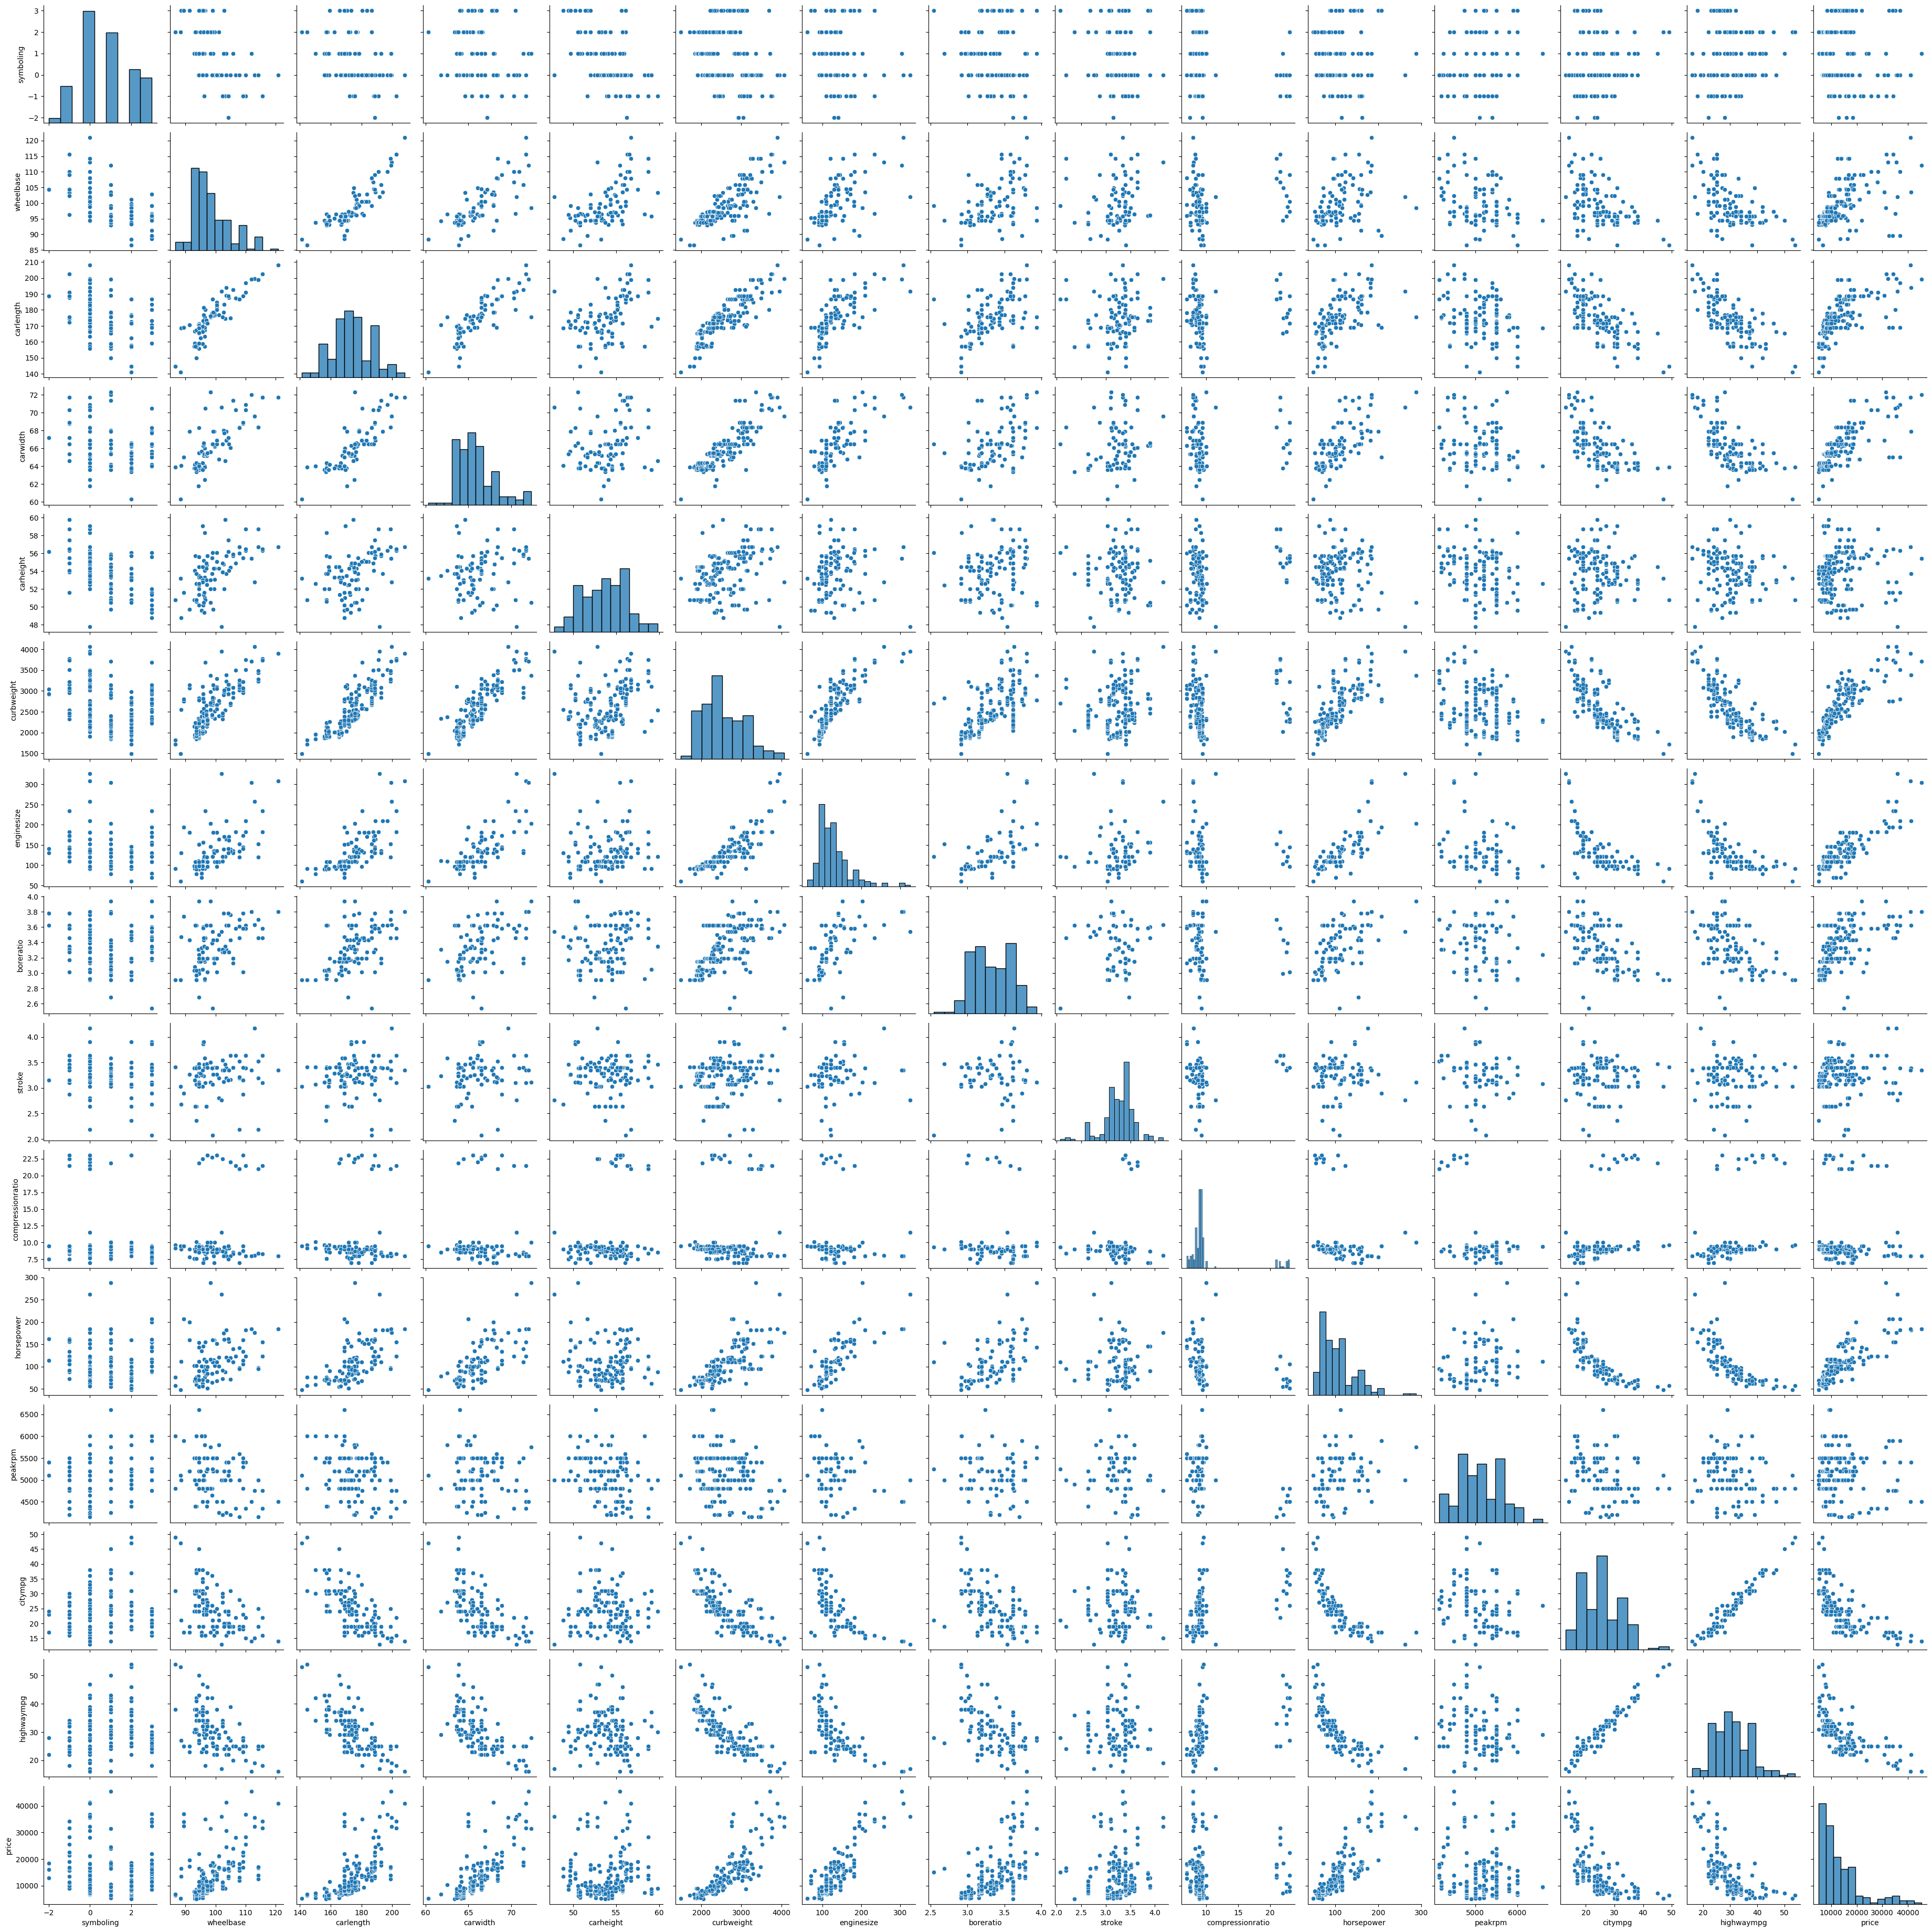

In [12]:
#Visualising the Data
#Let's plot a pair plot of all variables in our dataframe
sns.pairplot(car_details)
plt.show()

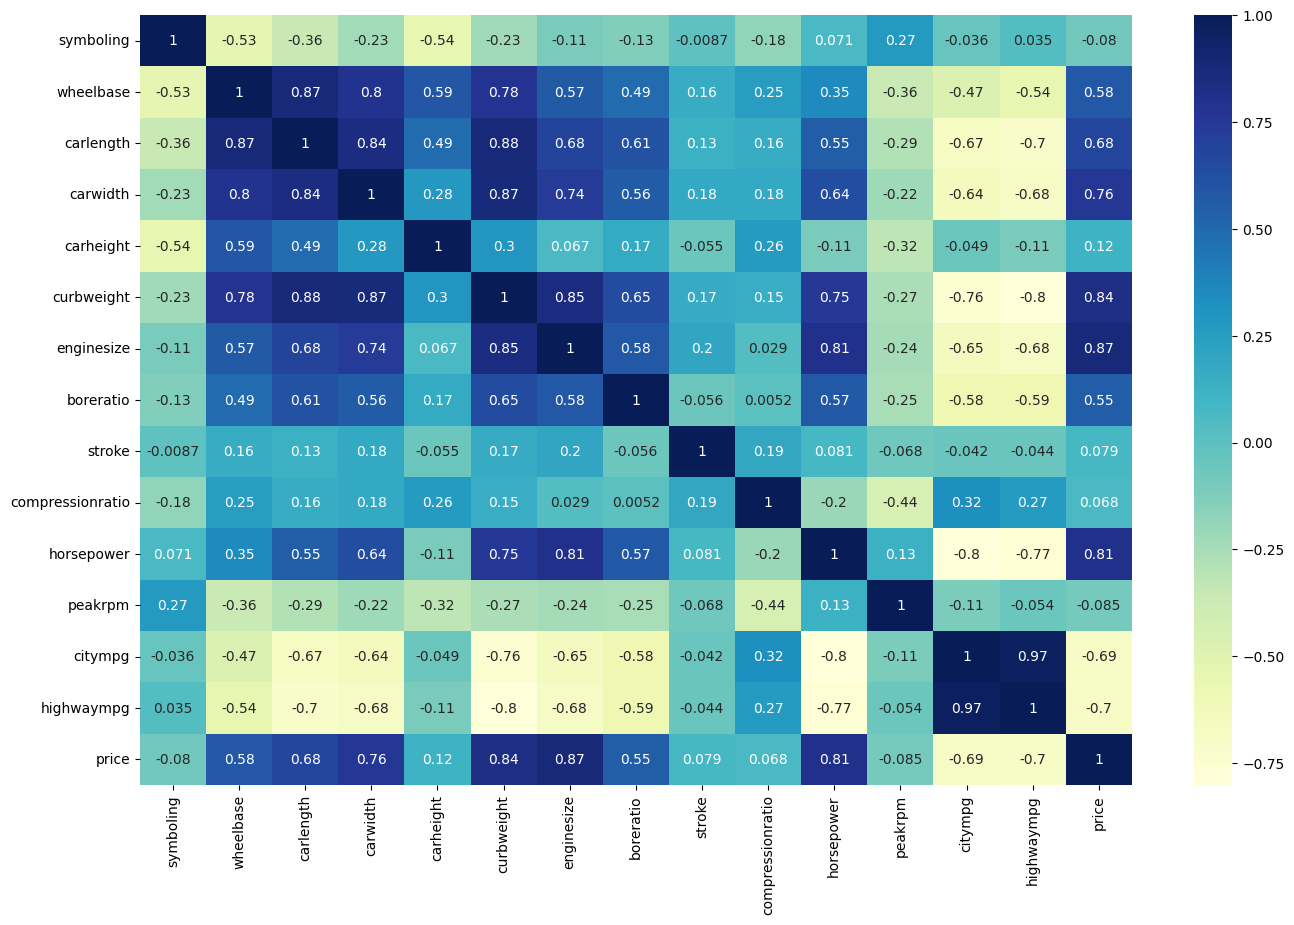

In [13]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_details.corr(), annot = True, cmap="YlGnBu")
plt.show()

From this, we can have a general sense of which features are related to price. We can spot some features which has some kind of positive relationships going on with the dependent price variable like,
wheelbase,
carlength,
carwidth,
curbweight,
enginesize,
boreratio,
horsepower.
However, there are also a few variables showing a negative relationship with price variable like,
citympg,
highwaympg. 

Also, at this state itself we see there is some obvious multicollinearity going on between predictor variables,

carlength with wheelbase, carwidth, curbweight
curbweight with enginesize, carlength, carwidth, wheelbase
enginesize with horsepower, crubweight and dimestions of car
highway and city mpg's are highly correlated with a pearson r cofficieant of 0.97.We might choose to drop anyone of these.

We also plot some negative corelation among varaibles,
crubweight,horsepower with the higway/city mpg's 

# Handling Categorical Variables
Let's also have a look at the categorical variables we have in the data.

Symboling is a categorical variable which has been treeted as a numeric int64 type variable. Let's convert the symboling variable. Here Symboling is the assigned insurance risk rating,A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. Let's make the category clear by classifying based on risk

-ve symboling as safe
0, 1 as moderate
2,3 as risky

In [14]:
car_details['symboling'] = car_details['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})
car_details

symboling                   CarName fueltype aspiration doornumber  \
0       risky        alfa-romero giulia      gas        std        two   
1       risky       alfa-romero stelvio      gas        std        two   
2    moderate  alfa-romero Quadrifoglio      gas        std        two   
3       risky               audi 100 ls      gas        std       four   
4       risky                audi 100ls      gas        std       four   
..        ...                       ...      ...        ...        ...   
200      safe           volvo 145e (sw)      gas        std       four   
201      safe               volvo 144ea      gas      turbo       four   
202      safe               volvo 244dl      gas        std       four   
203      safe                 volvo 246   diesel      turbo       four   
204      safe               volvo 264gl      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0    convertible        rwd          front       88.6      168.8  ...   
1    convertible        rwd          front       88.6      168.8  ...   
2      hatchback        rwd          front       94.5      171.2  ...   
3          sedan        fwd          front       99.8      176.6  ...   
4          sedan        4wd          front       99.4      176.6  ...   
..           ...        ...            ...        ...        ...  ...   
200        sedan        rwd          front      109.1      188.8  ...   
201        sedan        rwd          front      109.1      188.8  ...   
202        sedan        rwd          front      109.1      188.8  ...   
203        sedan        rwd          front      109.1      188.8  ...   
204        sedan        rwd          front      109.1      188.8  ...   

     enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0           130        mpfi       3.47   2.68              9.0         111   
1           130        mpfi       3.47   2.68              9.0         111   
2           152        mpfi       2.68   3.47              9.0         154   
3           109        mpfi       3.19   3.40             10.0         102   
4           136        mpfi       3.19   3.40              8.0         115   
..          ...         ...        ...    ...              ...         ...   
200         141        mpfi       3.78   3.15              9.5         114   
201         141        mpfi       3.78   3.15              8.7         160   
202         173        mpfi       3.58   2.87              8.8         134   
203         145         idi       3.01   3.40             23.0         106   
204         141        mpfi       3.78   3.15              9.5         114   

    peakrpm  citympg  highwaympg    price  
0      5000       21          27  13495.0  
1      5000       21          27  16500.0  
2      5000       19          26  16500.0  
3      5500       24          30  13950.0  
4      5500       18          22  17450.0  
..      ...      ...         ...      ...  
200    5400       23          28  16845.0  
201    5300       19          25  19045.0  
202    5500       18          23  21485.0  
203    4800       26          27  22470.0  
204    5400       19          25  22625.0  

[205 rows x 25 columns]

The categorical variable CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building

In [15]:
car_details['car_company'] = car_details['CarName'].apply(lambda x: x.split( )[0])
car_details.drop('CarName',axis=1,inplace=True)
car_details.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0     risky      gas        std        two  convertible        rwd   
1     risky      gas        std        two  convertible        rwd   
2  moderate      gas        std        two    hatchback        rwd   
3     risky      gas        std       four        sedan        fwd   
4     risky      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0          front       88.6      168.8      64.1  ...        mpfi       3.47   
1          front       88.6      168.8      64.1  ...        mpfi       3.47   
2          front       94.5      171.2      65.5  ...        mpfi       2.68   
3          front       99.8      176.6      66.2  ...        mpfi       3.19   
4          front       99.4      176.6      66.4  ...        mpfi       3.19   

  stroke compressionratio  horsepower peakrpm  citympg  highwaympg    price  \
0   2.68              9.0         111    5000       21          27  13495.0   
1   2.68              9.0         111    5000       21          27  16500.0   
2   3.47              9.0         154    5000       19          26  16500.0   
3   3.40             10.0         102    5500       24          30  13950.0   
4   3.40              8.0         115    5500       18          22  17450.0   

   car_company  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 25 columns]

In [16]:
#checking for unique companies
car_details['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Here, we observe that there are multiple company name being misspelled. lets fix it.

In [17]:
# Correcting the misspelled company names.
car_details['car_company'].replace('maxda','mazda',inplace=True)
car_details['car_company'].replace('Nissan','nissan',inplace=True)
car_details['car_company'].replace('porcshce','porsche',inplace=True)
car_details['car_company'].replace('toyouta','toyota',inplace=True)
car_details['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
car_details.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0     risky      gas        std        two  convertible        rwd   
1     risky      gas        std        two  convertible        rwd   
2  moderate      gas        std        two    hatchback        rwd   
3     risky      gas        std       four        sedan        fwd   
4     risky      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0          front       88.6      168.8      64.1  ...        mpfi       3.47   
1          front       88.6      168.8      64.1  ...        mpfi       3.47   
2          front       94.5      171.2      65.5  ...        mpfi       2.68   
3          front       99.8      176.6      66.2  ...        mpfi       3.19   
4          front       99.4      176.6      66.4  ...        mpfi       3.19   

  stroke compressionratio  horsepower peakrpm  citympg  highwaympg    price  \
0   2.68              9.0         111    5000       21          27  13495.0   
1   2.68              9.0         111    5000       21          27  16500.0   
2   3.47              9.0         154    5000       19          26  16500.0   
3   3.40             10.0         102    5500       24          30  13950.0   
4   3.40              8.0         115    5500       18          22  17450.0   

   car_company  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 25 columns]

In [18]:
#Function for plotting graphs 
#Function to show labels in bar plots
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [19]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

In [20]:
def plot_cat(var_list):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = car_details)
    plt.show()

In [25]:
from scipy.stats import norm
def plot_dist(var_list):
#Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        sns.distplot(car_details[var], fit=norm, kde=False)
    plt.show()

In [26]:
categorical_variables = list(car_details.columns[car_details.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

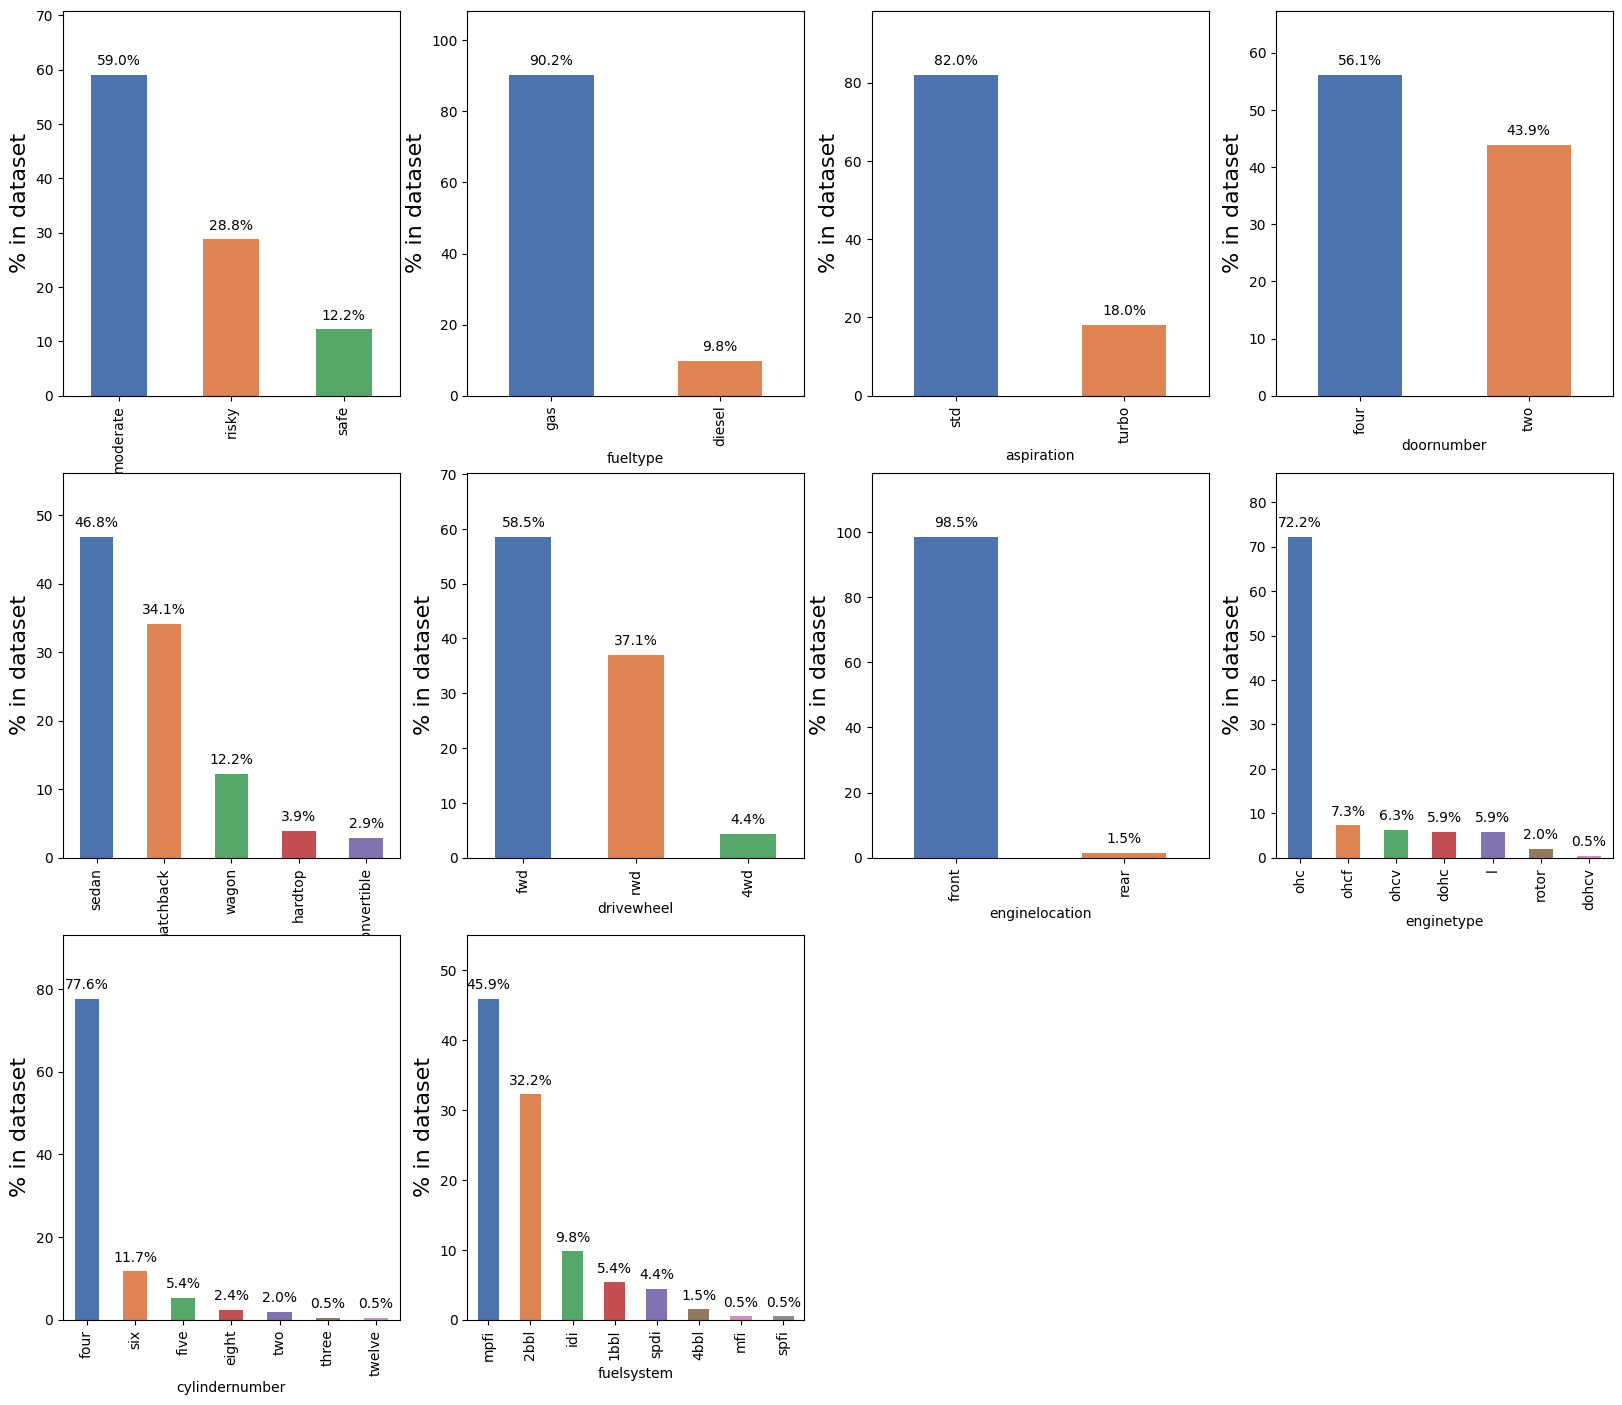

In [27]:
# market percentage of car's with respect to features
plot_percentages(car_details,categorical_variables[:-1])

 We can identify the some of the car features that are predominant in the US Automobile Market, Geely Automotives can consider these facts to full fill the market dominant needs and make the needed changes to their manufacturing line. These features are:

symboling: moderate (0,1)
Carbody: Sedan
fueltype: gas
aspiration: standard
doornumbers: four
drivewheel: forward
engine location: front
engine type: ohc
cylinderNumber: four
fuelSystem: mpfi

<Figure size 1000x1200 with 0 Axes>

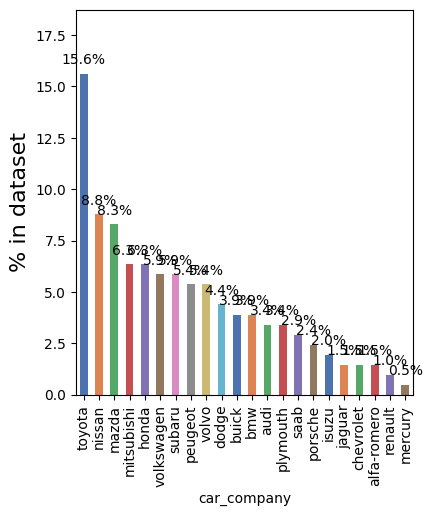

<Figure size 1000x1200 with 0 Axes>

In [31]:
#graph to plot most popular Automobile company in the US Automobile Market
plot_percentages(car_details,[categorical_variables[-1]])
plt.figure(figsize=(10, 12))


Toyota clearly has a dominant market percentage in the US of 15.6%.
This is followed by:
Nissan with 8.8%
Mazda with 8.2%
Mitsubishi and Honda are equally popular with 6.3% market percentage.

Let's see how these categorical variables relate one-to-one with the outcome variable price.

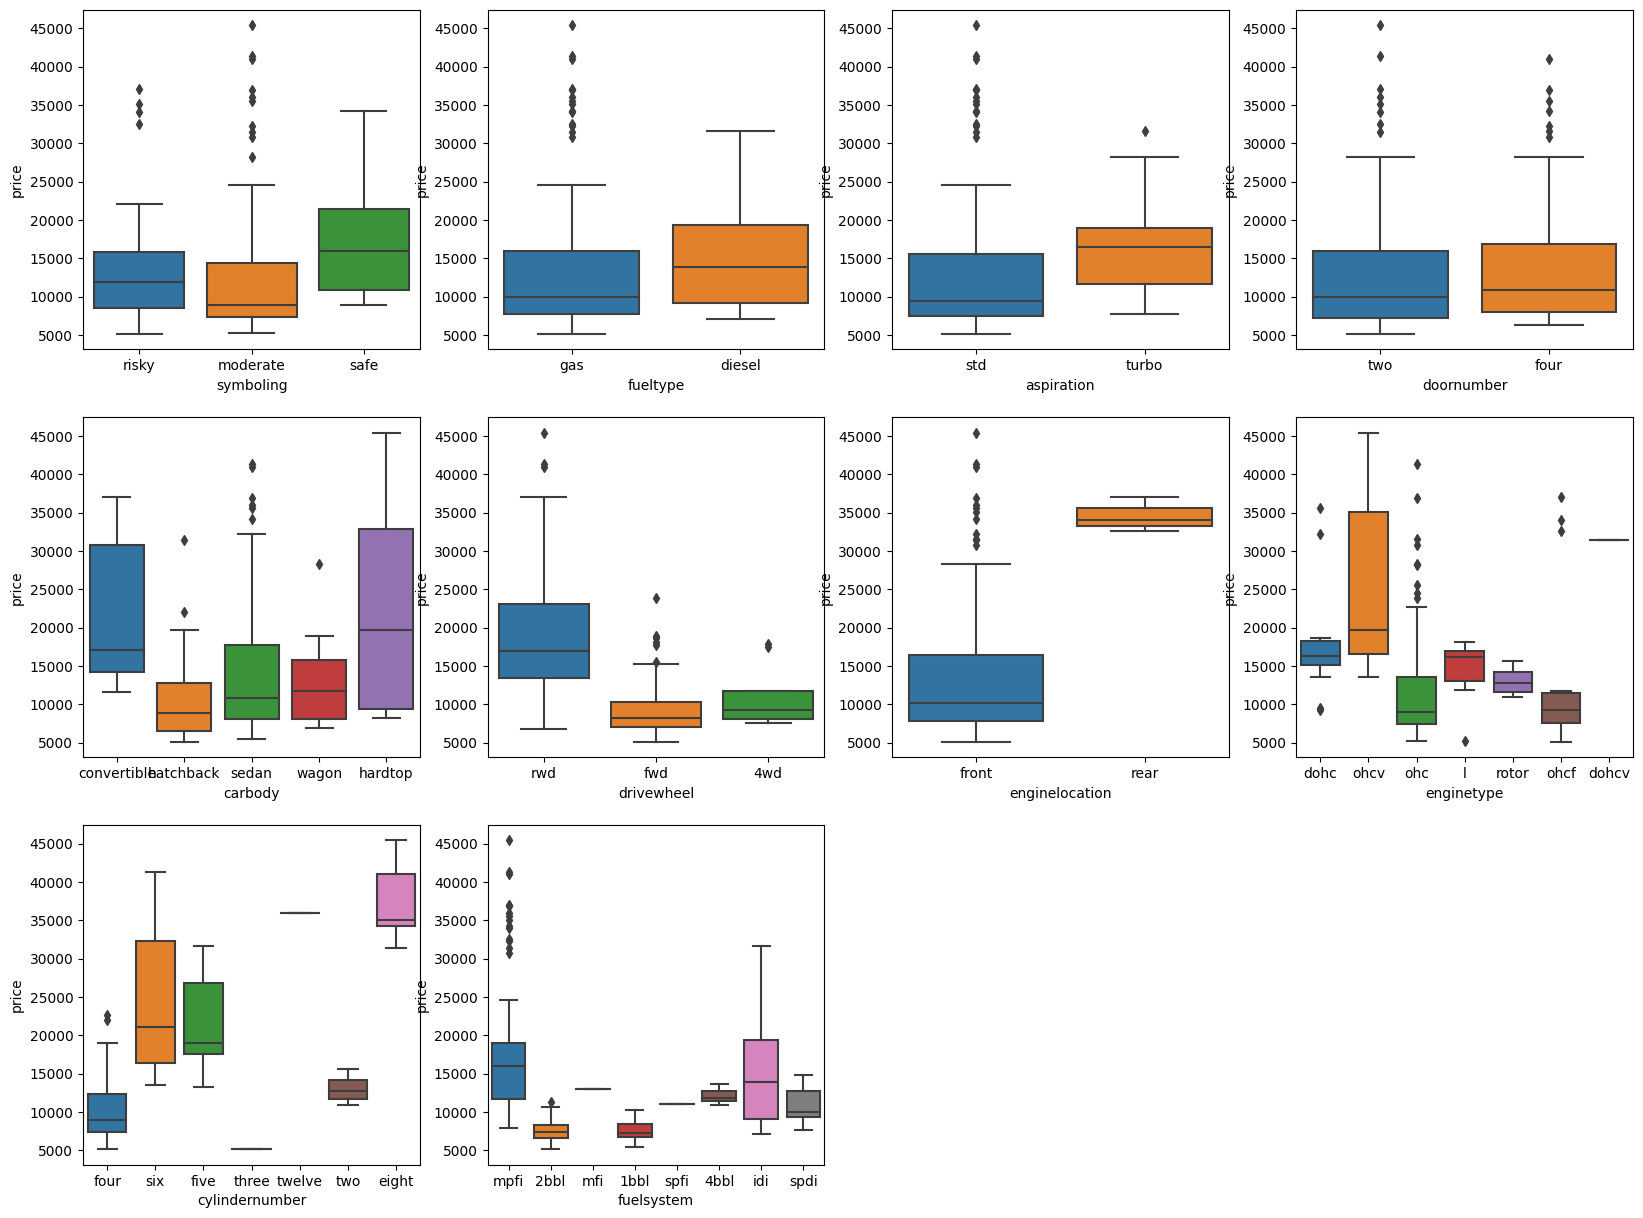

In [32]:
# ploting all variables excluding car_company against the output variable
plot_cat(categorical_variables[:-1])

Observations:

Although not significant but still the fuel type seems have an effect on the pricing of the cars. Let's confirm this later.
enginelocation and aspiration surly has a visible affect on the pricing of the car
The price of real wheel drive is significantly higher that other drivewheel options.
cylindernumber and engine type also seem to regulate the price of cars.
hardtop and convertables cars are definatly priced higher than other body types available. Tells us that variable carbody is contributing in determinig the price.

Let's see how the prices vary with the different automobile companies in the US market

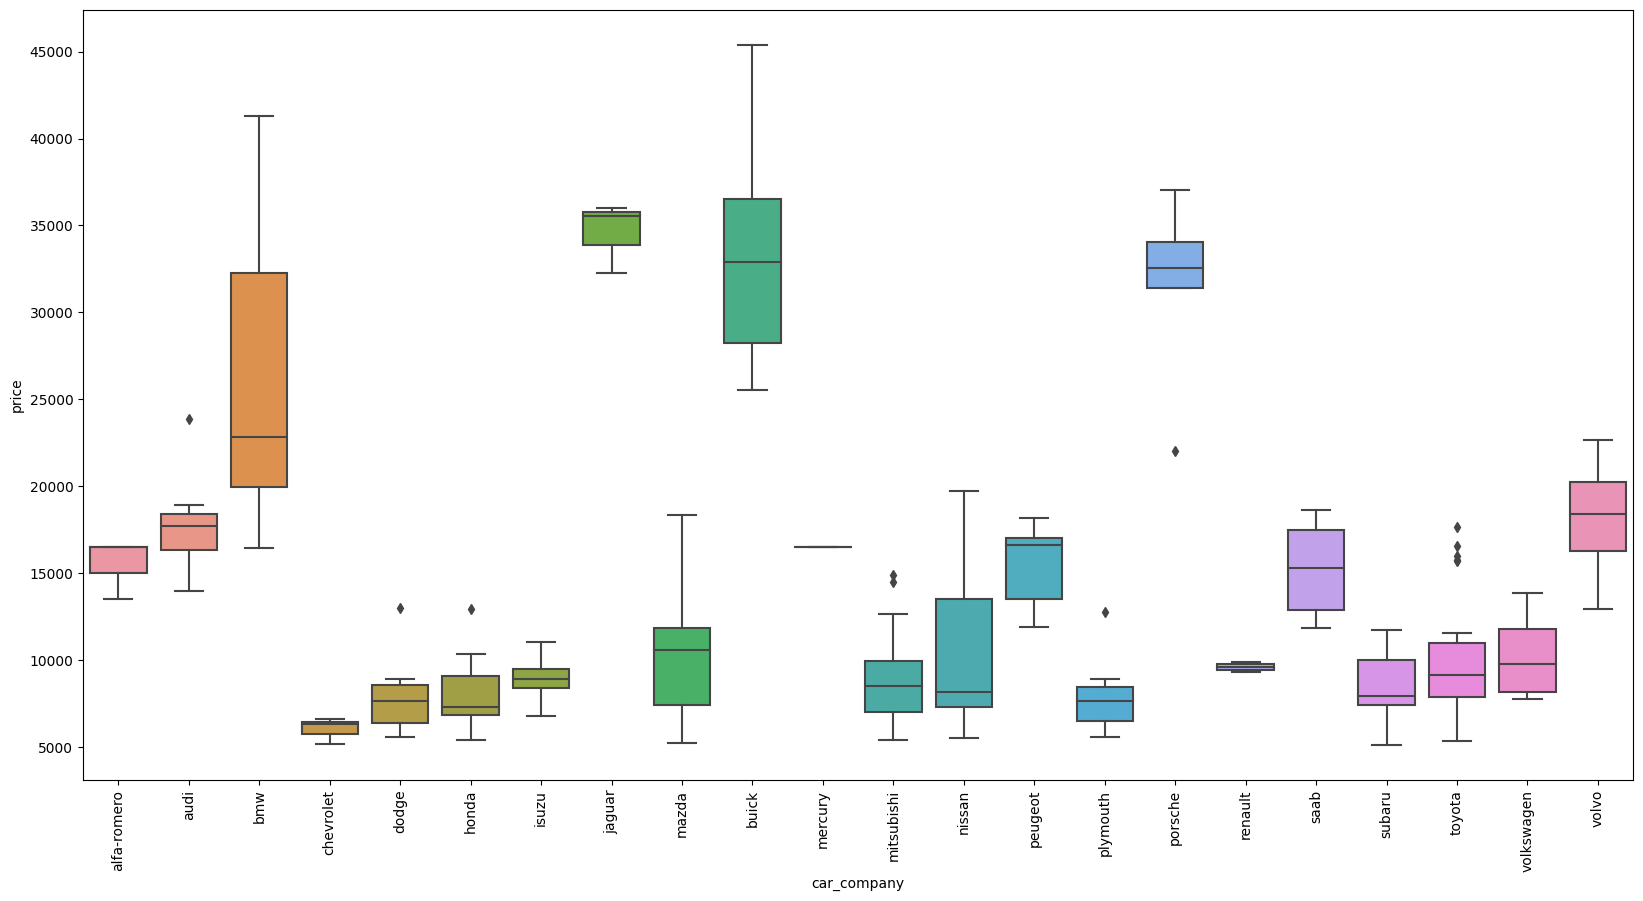

Average US car price:  13276.710570731706
car_company
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_variables[-1], y = 'price', data = car_details)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',car_details['price'].mean())
print(car_details.groupby('car_company').price.mean().sort_values(ascending=False).head())

Observation:

Each company has a range in which the cars are priced. There are few outilers for these companies showing that they do manufacture some expensive cars which are priced above their usual market pricing range.
Cars manufacturers like jaguar, Buick, Porsche, BMW, Volo are clearly on the high end side, priced well above the average US cars price which is approx. $13,000.
company name shows some affect on the price determination.

We can also see how multiple categorical variables together affect the pricing of cars.

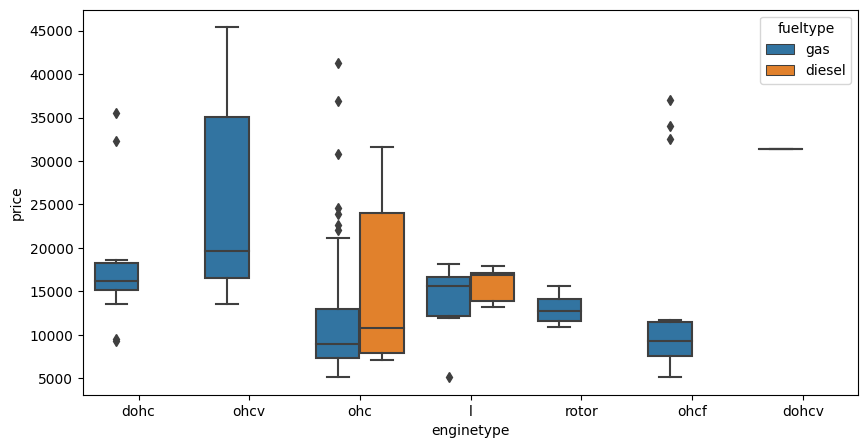

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=car_details)
plt.show()

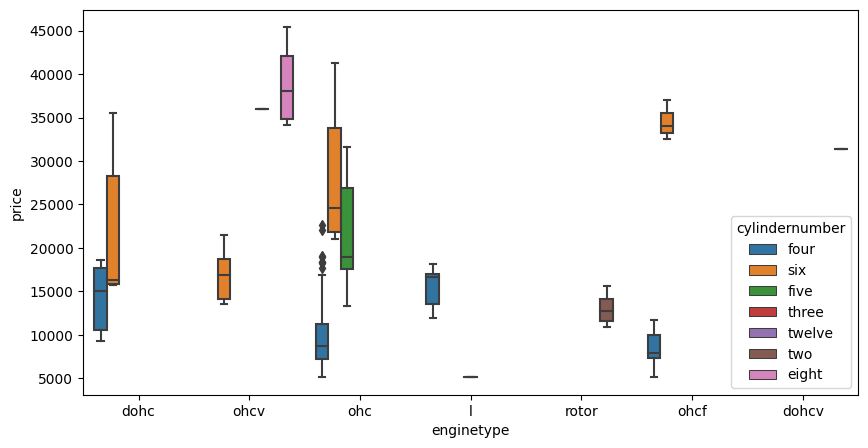

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=car_details)
plt.show()

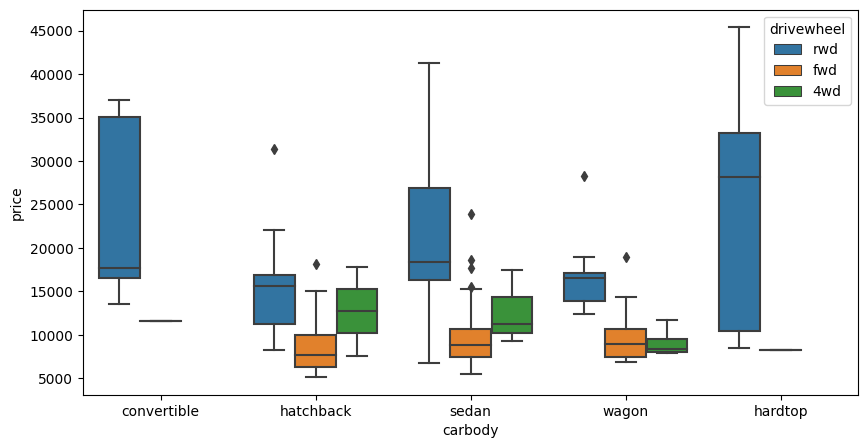

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=car_details)
plt.show()

# Outlier treatment

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


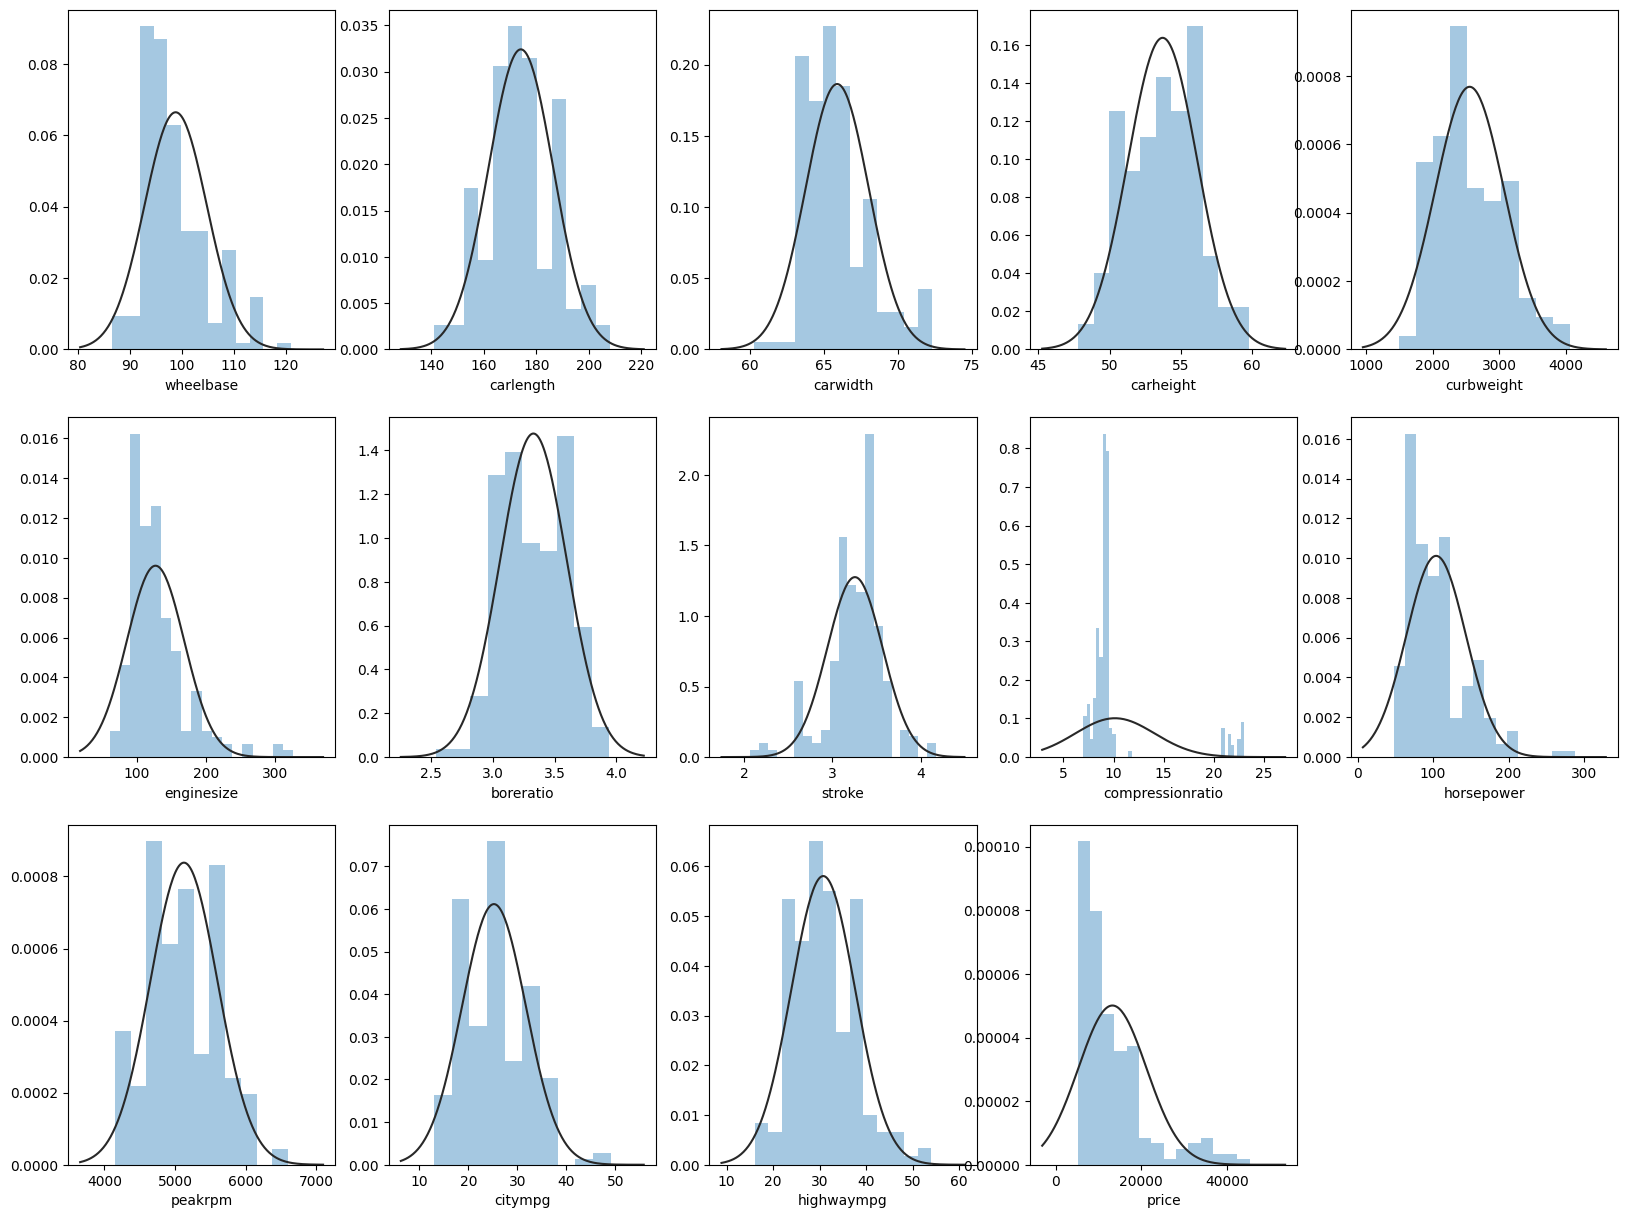

In [37]:
numeric_variables = list(car_details.columns[car_details.dtypes != 'object'])
print(numeric_variables)
plot_dist(numeric_variables)

We see enginesize, horsepower and compression ratio variables to have a right skewed distribution, this is probably due to outliers in the variable

In [38]:
print(car_details[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(car_details[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


We decide to treat the outliers by clipping the variables curbweight','horsepower','enginesize' at 96 precentile value. And clip compressionratio at 90 percentile value

In [39]:
# Outilers in price of cars
car_details['horsepower'][np.abs(car_details['horsepower'] > 182.00)]= 182.00
car_details['horsepower'][np.abs(car_details['horsepower'] > 3657.80)]= 3657.80
car_details['enginesize'][np.abs(car_details['enginesize'] > 209.00)]= 209.00
car_details['compressionratio'][np.abs(car_details['compressionratio'] > 10.94)]= 10.94

Lets keep car data for which the price is less than 3 standard deviation.

In [40]:
car_details= car_details[np.abs(car_details.price-car_details.price.mean()) <= (3*car_details.price.std())]

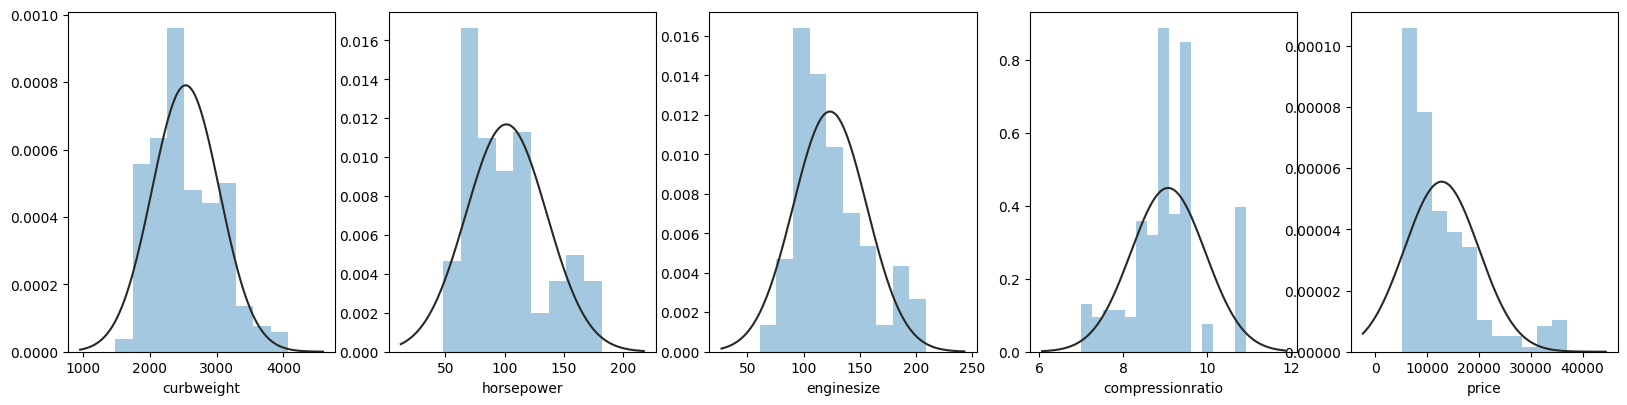

In [41]:
plot_dist(['curbweight','horsepower','enginesize','compressionratio','price'])

Creating new variables

This will be helpful to remove corelated variables.

Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation between carlength, wheelbase, car width, car weight and city/highway mpg's. Lets create new variables from these to try reducing the multicolinearlity.

In [42]:
#Creating new variable carLWratio
car_details['carLWratio'] = car_details.carlength/car_details.carwidth
# Creating new variable carWHratio
car_details['carWHratio'] = car_details.carwidth/car_details.carheight
# Creating new variable PWratio
car_details['PWratio'] = car_details.horsepower/car_details.curbweight
# Creating new variable HCmpgratio
car_details['HCmpgratio'] = car_details.highwaympg/car_details.citympg
## droping the orignal variables
car_details.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

Since we saw that the company brand value also is determinig the pricing of the car. Let's create a company_segment categorical variable which would suggest, under which segment tier does the car_company comes under. We will segment the car companies based on the mean company price as

lowtier if company mean price is below 10,000
midtier if company mean price is above 10,000 and below 20,000
hightier if company mean price is above 20,000

In [43]:
car_details.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [44]:
company_segment_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
car_details['company_segment'] = car_details['car_company'].map(company_segment_dict)
# Dropping the orignal car_company variable
car_details.drop('car_company',axis=1,inplace=True)
car_details.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0     risky      gas        std        two  convertible        rwd   
1     risky      gas        std        two  convertible        rwd   
2  moderate      gas        std        two    hatchback        rwd   
3     risky      gas        std       four        sedan        fwd   
4     risky      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  curbweight enginetype  ... stroke  \
0          front       88.6        2548       dohc  ...   2.68   
1          front       88.6        2548       dohc  ...   2.68   
2          front       94.5        2823       ohcv  ...   3.47   
3          front       99.8        2337        ohc  ...   3.40   
4          front       99.4        2824        ohc  ...   3.40   

   compressionratio horsepower  peakrpm    price  carLWratio  carWHratio  \
0               9.0        111     5000  13495.0    2.633385    1.313525   
1               9.0        111     5000  16500.0    2.633385    1.313525   
2               9.0        154     5000  16500.0    2.613740    1.250000   
3              10.0        102     5500  13950.0    2.667674    1.219153   
4               8.0        115     5500  17450.0    2.659639    1.222836   

    PWratio  HCmpgratio  company_segment  
0  0.043564    1.285714          midtier  
1  0.043564    1.285714          midtier  
2  0.054552    1.368421          midtier  
3  0.043646    1.250000          midtier  
4  0.040722    1.222222          midtier  

[5 rows x 24 columns]

In [45]:
car_details.groupby('company_segment').price.mean()

company_segment
hightier    29107.309524
lowtier      8987.369565
midtier     13231.839151
Name: price, dtype: float64

Handeling Categorical Variable for Linear Regression

In [46]:
# Converting categorical variables with two levels to either 1 or 0
car_details['fueltype'] = car_details['fueltype'].map({'gas': 1, 'diesel': 0})
car_details['aspiration'] = car_details['aspiration'].map({'std': 1, 'turbo': 0})
car_details['doornumber'] = car_details['doornumber'].map({'two': 1, 'four': 0})
car_details['enginelocation'] = car_details['enginelocation'].map({'front': 1, 'rear': 0})
car_details.head()

symboling  fueltype  aspiration  doornumber      carbody drivewheel  \
0     risky         1           1           1  convertible        rwd   
1     risky         1           1           1  convertible        rwd   
2  moderate         1           1           1    hatchback        rwd   
3     risky         1           1           0        sedan        fwd   
4     risky         1           1           0        sedan        4wd   

   enginelocation  wheelbase  curbweight enginetype  ... stroke  \
0               1       88.6        2548       dohc  ...   2.68   
1               1       88.6        2548       dohc  ...   2.68   
2               1       94.5        2823       ohcv  ...   3.47   
3               1       99.8        2337        ohc  ...   3.40   
4               1       99.4        2824        ohc  ...   3.40   

   compressionratio horsepower  peakrpm    price  carLWratio  carWHratio  \
0               9.0        111     5000  13495.0    2.633385    1.313525   
1               9.0        111     5000  16500.0    2.633385    1.313525   
2               9.0        154     5000  16500.0    2.613740    1.250000   
3              10.0        102     5500  13950.0    2.667674    1.219153   
4               8.0        115     5500  17450.0    2.659639    1.222836   

    PWratio  HCmpgratio  company_segment  
0  0.043564    1.285714          midtier  
1  0.043564    1.285714          midtier  
2  0.054552    1.368421          midtier  
3  0.043646    1.250000          midtier  
4  0.040722    1.222222          midtier  

[5 rows x 24 columns]

In [47]:
# Creating dummy variables
df = pd.get_dummies(car_details)
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'company_segment_lowtier'],axis=1,inplace=True)
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carLWratio', 'carWHratio', 'PWratio',
       'HCmpgratio', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_hightier', 'company_segment_midtier'],
      dtype='object')

# Test Train Split

In [48]:
from sklearn.model_selection import train_test_split

# Splitting the avilable data into training and testing set.

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Feature scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [50]:
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio',
            'PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

fueltype  aspiration  doornumber  enginelocation  wheelbase  curbweight  \
1           1           1           1               1   0.068966    0.411171   
165         1           1           1               1   0.272414    0.301396   
197         1           1           0               1   0.610345    0.602793   
169         1           1           1               1   0.406897    0.412335   
190         1           1           1               1   0.272414    0.284329   

     enginesize  boreratio    stroke  compressionratio  ...  \
1      0.466216   0.664286  0.290476          0.507614  ...   
165    0.250000   0.500000  0.480952          0.609137  ...   
197    0.540541   0.885714  0.514286          0.634518  ...   
169    0.574324   0.771429  0.680952          0.583756  ...   
190    0.324324   0.464286  0.633333          0.380711  ...   

     cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
1                     0                0                0               0   
165                   0                0                0               0   
197                   0                0                0               0   
169                   0                0                0               0   
190                   0                0                0               0   

     fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
1                 0                1                0                0   
165               0                1                0                0   
197               0                1                0                0   
169               0                1                0                0   
190               0                1                0                0   

     company_segment_hightier  company_segment_midtier  
1                           0                        1  
165                         0                        0  
197                         0                        1  
169                         0                        0  
190                         0                        1  

[5 rows x 46 columns]

In [60]:
df_train.describe()

fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  141.000000  141.000000  141.000000      141.000000  141.000000   
mean     0.886525    0.794326    0.439716        0.985816    0.413402   
std      0.318304    0.405634    0.498122        0.118672    0.198892   
min      0.000000    0.000000    0.000000        0.000000    0.000000   
25%      1.000000    1.000000    0.000000        1.000000    0.272414   
50%      1.000000    1.000000    0.000000        1.000000    0.358621   
75%      1.000000    1.000000    1.000000        1.000000    0.503448   
max      1.000000    1.000000    1.000000        1.000000    1.000000   

       curbweight  enginesize   boreratio      stroke  compressionratio  ...  \
count  141.000000  141.000000  141.000000  141.000000        141.000000  ...   
mean     0.411779    0.420979    0.559980    0.551570          0.536415  ...   
std      0.198452    0.225970    0.192528    0.150278          0.229812  ...   
min      0.000000    0.000000    0.000000    0.000000          0.000000  ...   
25%      0.254849    0.243243    0.421429    0.490476          0.406091  ...   
50%      0.359193    0.337838    0.550000    0.571429          0.507614  ...   
75%      0.552366    0.540541    0.742857    0.633333          0.609137  ...   
max      1.000000    1.000000    1.000000    1.000000          1.000000  ...   

       cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
count          141.000000       141.000000       141.000000      141.000000   
mean             0.028369         0.333333         0.021277        0.113475   
std              0.166616         0.473085         0.144819        0.318304   
min              0.000000         0.000000         0.000000        0.000000   
25%              0.000000         0.000000         0.000000        0.000000   
50%              0.000000         0.000000         0.000000        0.000000   
75%              0.000000         1.000000         0.000000        0.000000   
max              1.000000         1.000000         1.000000        1.000000   

       fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
count           141.0       141.000000       141.000000       141.000000   
mean              0.0         0.425532         0.042553         0.007092   
std               0.0         0.496186         0.202567         0.084215   
min               0.0         0.000000         0.000000         0.000000   
25%               0.0         0.000000         0.000000         0.000000   
50%               0.0         0.000000         0.000000         0.000000   
75%               0.0         1.000000         0.000000         0.000000   
max               0.0         1.000000         1.000000         1.000000   

       company_segment_hightier  company_segment_midtier  
count                141.000000               141.000000  
mean                   0.106383                 0.468085  
std                    0.309426                 0.500759  
min                    0.000000                 0.000000  
25%                    0.000000                 0.000000  
50%                    0.000000                 0.000000  
75%                    0.000000                 1.000000  
max                    1.000000                 1.000000  

[8 rows x 45 columns]

Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

# Building our model

We will be using a mix approach. Initially using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn) and then using the Statmodel for statistics analysis of the model

# RFE(Recursive feature elimination)

In [65]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [68]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, )        # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 3),
 ('aspiration', False, 2),
 ('doornumber', False, 17),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 23),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 4),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('carLWratio', True, 1),
 ('carWHratio', True, 1),
 ('PWratio', True, 1),
 ('HCmpgratio', False, 15),
 ('symboling_moderate', False, 21),
 ('symboling_safe', False, 20),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 14),
 ('carbody_sedan', False, 10),
 ('carbody_wagon', False, 18),
 ('drivewheel_fwd', False, 22),
 ('drivewheel_rwd', False, 19),
 ('enginetype_dohc', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 5),
 ('enginetype_rotor', False, 11),
 ('cylindernumber_eight', False, 6),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_si

In [70]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'carLWratio', 'carWHratio', 'PWratio',
       'carbody_convertible', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcf', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'fuelsystem_4bbl', 'company_segment_hightier',
       'company_segment_midtier'],
      dtype='object')

In [71]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'curbweight',
       'compressionratio', 'HCmpgratio', 'symboling_moderate',
       'symboling_safe', 'carbody_hardtop', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [72]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

Custom Function Definations For model fitting

In [73]:
def fit_LRM(X_train):
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [74]:
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [75]:
lm=fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     139.0
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           9.85e-74
Time:                        21:15:23   Log-Likelihood:                 240.24
No. Observations:                 141   AIC:                            -434.5
Df Residuals:                     118   BIC:                            -366.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [76]:
X_train1 = X_train_rfe.drop('fuelsystem_4bbl', axis=1)

In [77]:
lm1=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     142.9
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           3.82e-74
Time:                        21:17:50   Log-Likelihood:                 238.38
No. Observations:                 141   AIC:                            -432.8
Df Residuals:                     119   BIC:                            -367.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

cylindernumber_five has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [78]:
X_train2 = X_train1.drop('cylindernumber_five', axis=1)

In [79]:
lm2=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.38e-74
Time:                        21:20:17   Log-Likelihood:                 234.99
No. Observations:                 141   AIC:                            -428.0
Df Residuals:                     120   BIC:                            -366.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

cylindernumber_six has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [80]:
X_train3 = X_train2.drop('cylindernumber_six', axis=1)

In [81]:
lm3=fit_LRM(X_train3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     152.3
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.17e-75
Time:                        21:21:45   Log-Likelihood:                 234.77
No. Observations:                 141   AIC:                            -429.5
Df Residuals:                     121   BIC:                            -370.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [82]:
X_train4 = X_train3.drop('carLWratio', axis=1)

In [83]:
lm4=fit_LRM(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.18e-74
Time:                        21:22:44   Log-Likelihood:                 230.83
No. Observations:                 141   AIC:                            -423.7
Df Residuals:                     122   BIC:                            -367.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [84]:
getVIF(X_train4)

Features    VIF
5                 horsepower  91.99
8                    PWratio  88.21
0             enginelocation  48.82
2                 enginesize  36.95
3                  boreratio  31.48
4                     stroke  28.49
1                  wheelbase  24.57
7                 carWHratio  15.93
14       cylindernumber_four  13.16
6                    peakrpm   9.99
12            enginetype_ohc   9.21
13           enginetype_ohcf   3.31
16  company_segment_hightier   3.31
17   company_segment_midtier   3.01
9        carbody_convertible   1.77
10           enginetype_dohc   1.66
15     cylindernumber_twelve   1.55
11          enginetype_dohcv   1.39

<AxesSubplot: >

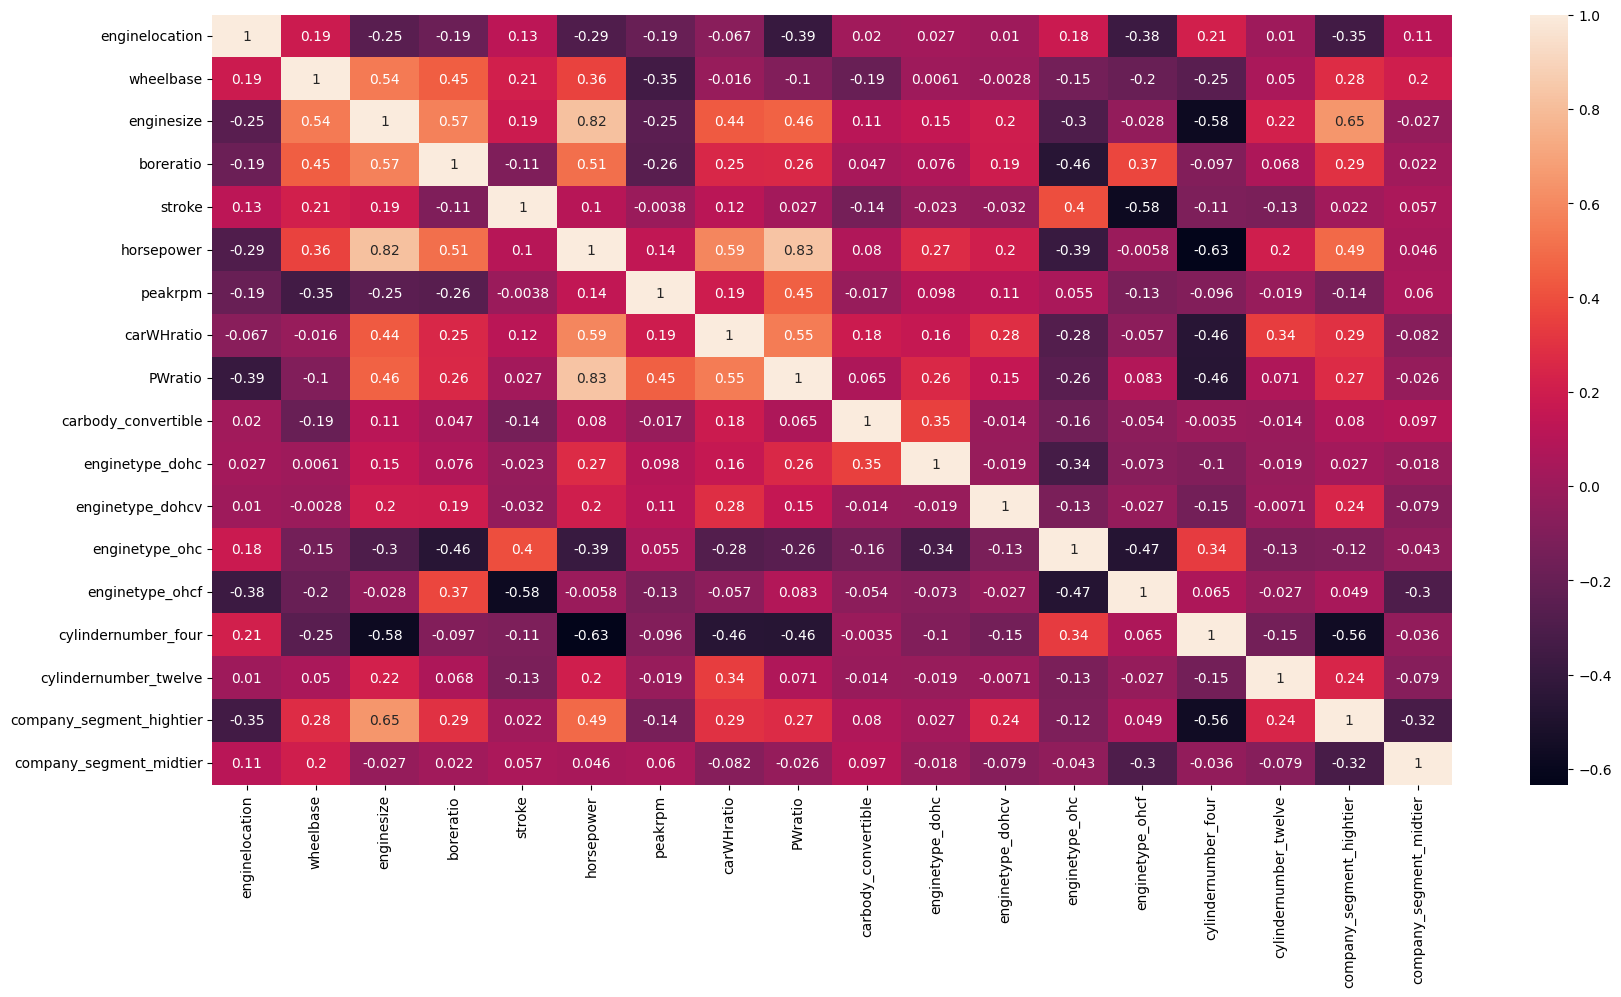

In [85]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train4.corr(),annot = True)

Removing carLWratio had no impact on the Adj. R-Squared.
PWratio is having the highest VIF and is strongly corelated with horsepower, carWHratio and peakrpm. Let's remove this

In [86]:
X_train5 = X_train4.drop('PWratio', axis=1)
lm5=fit_LRM(X_train5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.53e-66
Time:                        21:26:52   Log-Likelihood:                 206.33
No. Observations:                 141   AIC:                            -376.7
Df Residuals:                     123   BIC:                            -323.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [87]:
getVIF(X_train5)

Features    VIF
0             enginelocation  43.34
2                 enginesize  35.12
3                  boreratio  31.33
4                     stroke  27.93
5                 horsepower  24.46
1                  wheelbase  16.11
7                 carWHratio  15.86
13       cylindernumber_four  12.43
11            enginetype_ohc   9.00
6                    peakrpm   8.24
15  company_segment_hightier   3.25
12           enginetype_ohcf   3.03
16   company_segment_midtier   2.98
8        carbody_convertible   1.71
9            enginetype_dohc   1.66
14     cylindernumber_twelve   1.42
10          enginetype_dohcv   1.34

<AxesSubplot: >

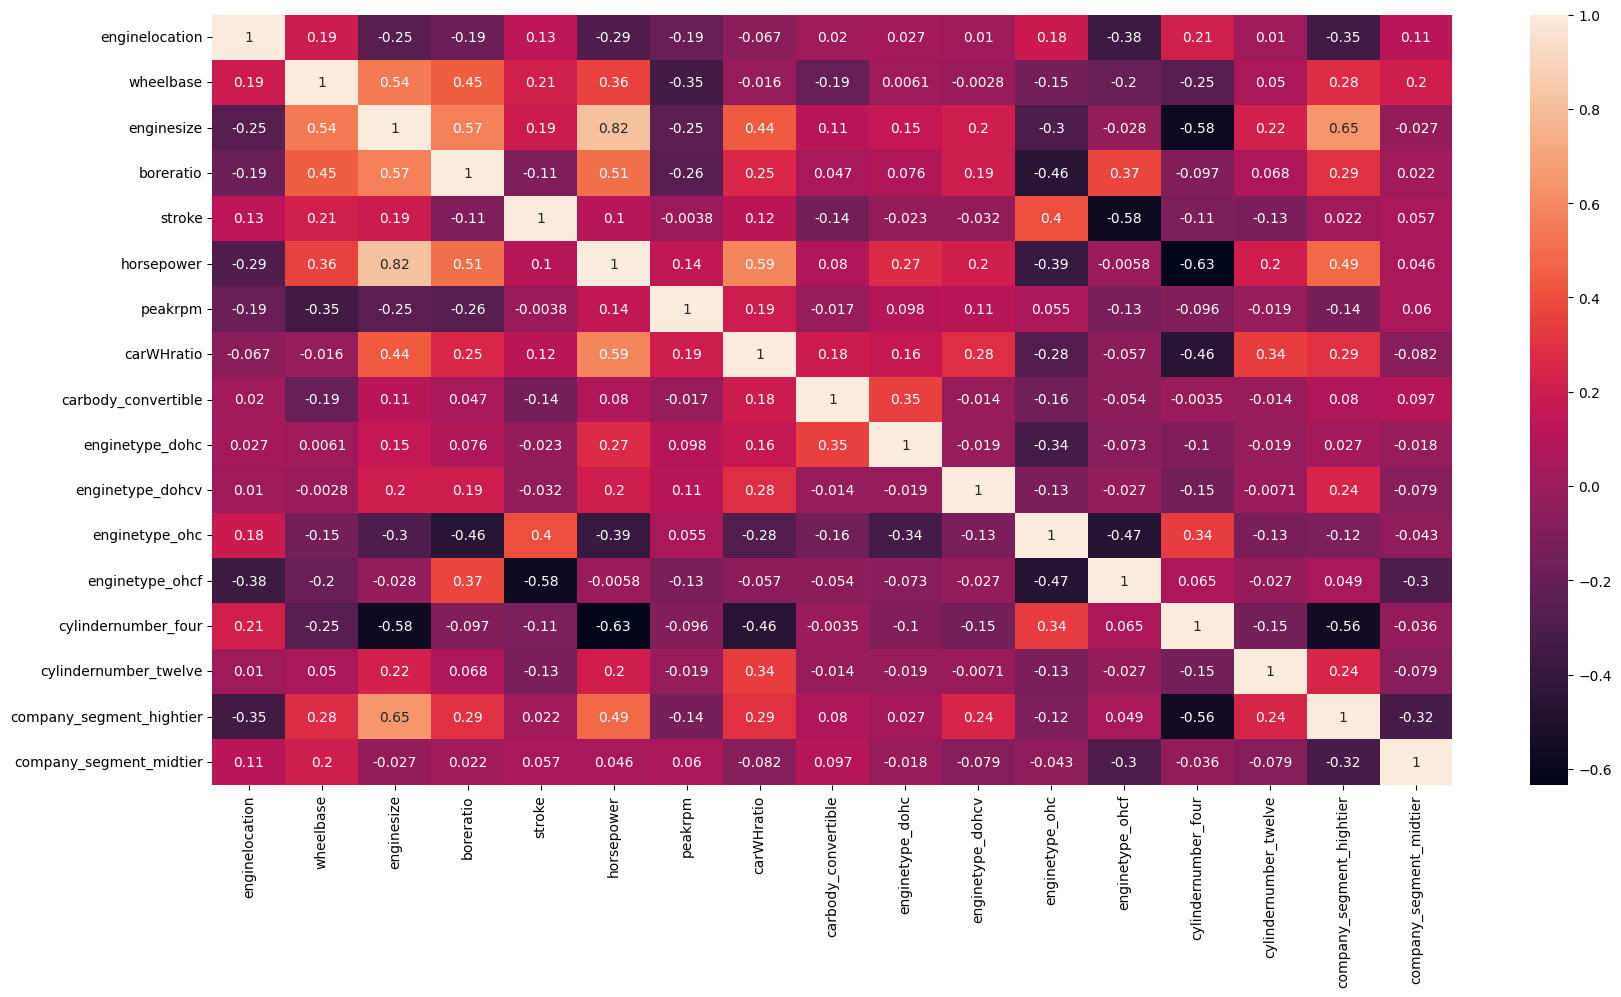

In [88]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train5.corr(),annot = True)

removing PWratio reduced the Adj. R-Squared to 0.926(not much)
peakrpm is having high p-value. Let's remove this

In [89]:
X_train6 = X_train5.drop('peakrpm', axis=1)
lm6=fit_LRM(X_train6)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     121.1
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.44e-67
Time:                        21:29:00   Log-Likelihood:                 206.27
No. Observations:                 141   AIC:                            -378.5
Df Residuals:                     124   BIC:                            -328.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [90]:
X_train7 = X_train6.drop('enginetype_ohc', axis=1)
lm7=fit_LRM(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     128.9
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.27e-68
Time:                        21:29:23   Log-Likelihood:                 205.57
No. Observations:                 141   AIC:                            -379.1
Df Residuals:                     125   BIC:                            -332.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [91]:
X_train8 = X_train7.drop('stroke', axis=1)
lm8=fit_LRM(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           3.90e-69
Time:                        21:29:45   Log-Likelihood:                 204.76
No. Observations:                 141   AIC:                            -379.5
Df Residuals:                     126   BIC:                            -335.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [92]:
getVIF(X_train8)

Features    VIF
3                  boreratio  29.62
0             enginelocation  28.05
2                 enginesize  25.10
4                 horsepower  17.21
5                 carWHratio  14.71
1                  wheelbase  14.60
10       cylindernumber_four   9.68
13   company_segment_midtier   2.91
12  company_segment_hightier   2.83
9            enginetype_ohcf   2.02
6        carbody_convertible   1.50
7            enginetype_dohc   1.40
8           enginetype_dohcv   1.20
11     cylindernumber_twelve   1.20

<AxesSubplot: >

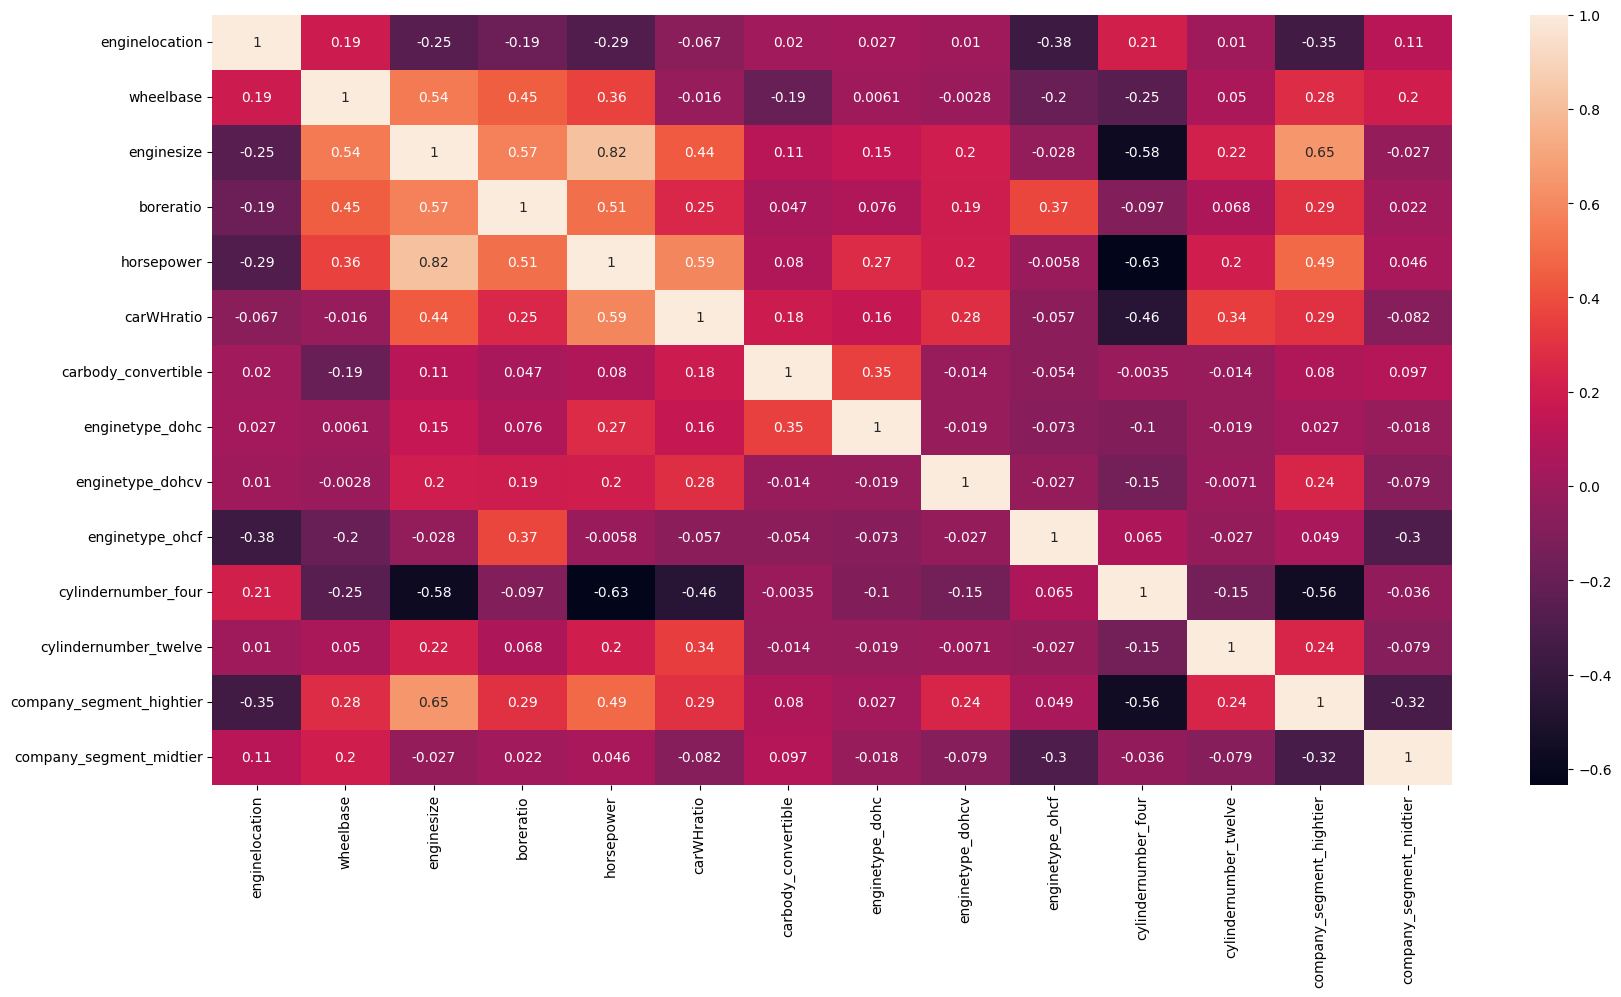

In [93]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train8.corr(),annot = True)

enginelocation is having the highest VIF. Let's remove this.

In [94]:
X_train9 = X_train8.drop('enginelocation', axis=1)
lm9=fit_LRM(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     121.0
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           6.98e-65
Time:                        21:31:52   Log-Likelihood:                 191.00
No. Observations:                 141   AIC:                            -354.0
Df Residuals:                     127   BIC:                            -312.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [95]:
getVIF(X_train9)

Features    VIF
2                  boreratio  29.50
1                 enginesize  25.06
3                 horsepower  17.13
0                  wheelbase  12.11
4                 carWHratio   9.21
9        cylindernumber_four   5.90
11  company_segment_hightier   2.82
12   company_segment_midtier   2.82
8            enginetype_ohcf   2.02
5        carbody_convertible   1.50
6            enginetype_dohc   1.40
7           enginetype_dohcv   1.20
10     cylindernumber_twelve   1.18

<AxesSubplot: >

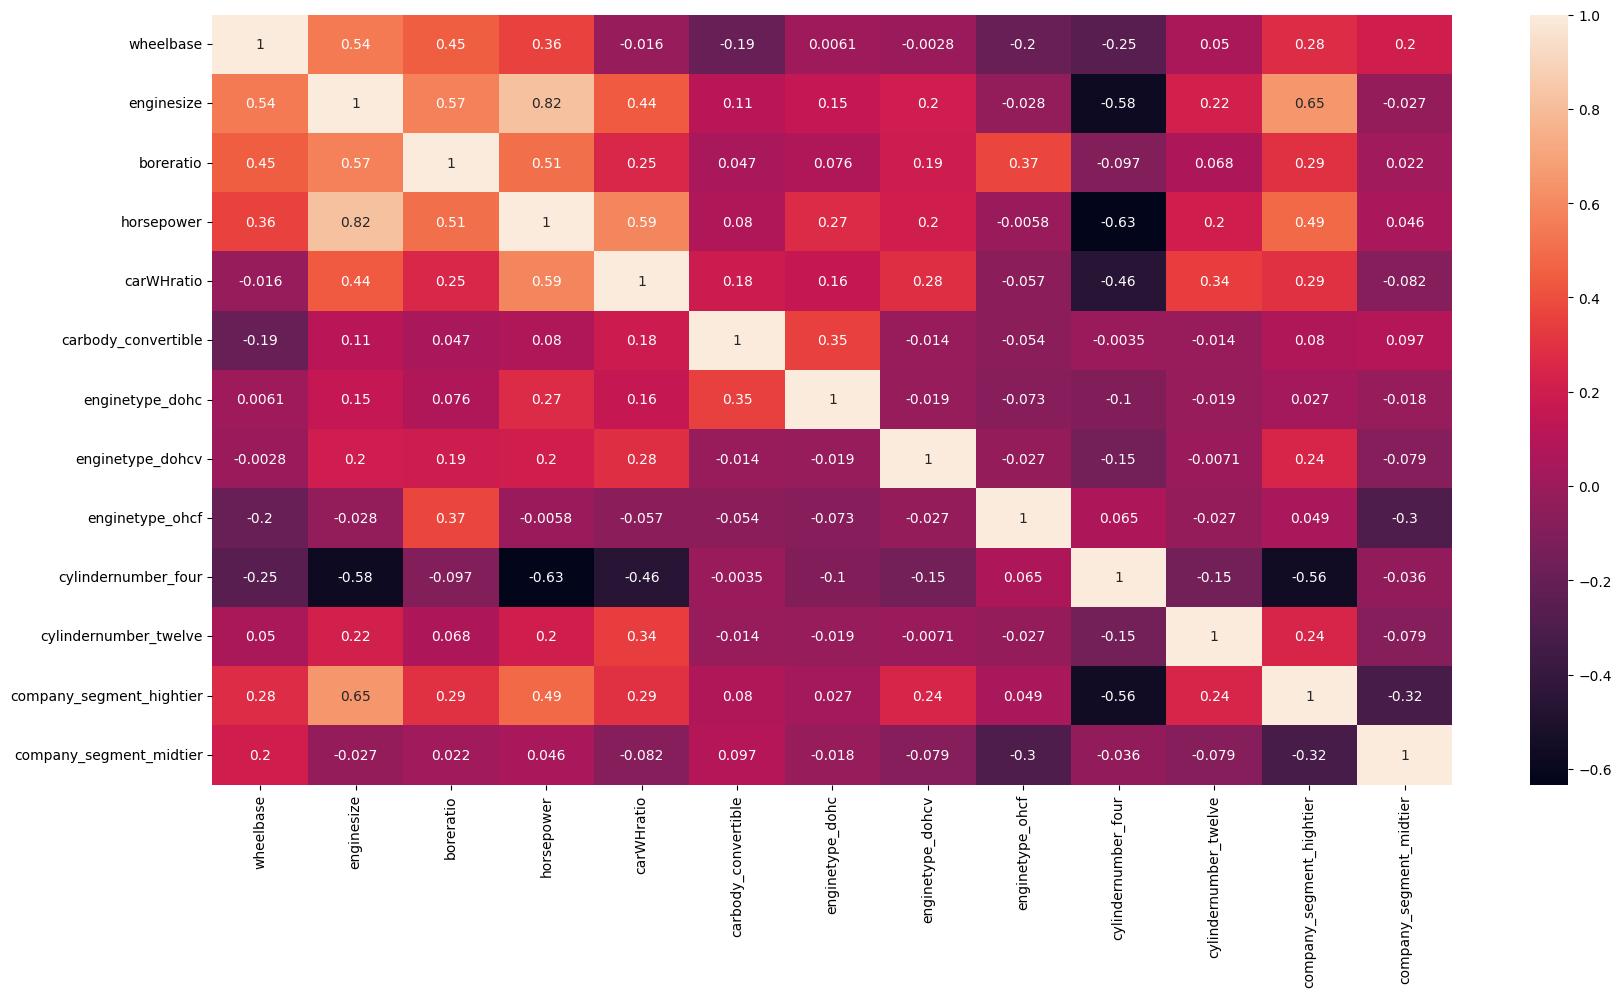

In [96]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train9.corr(),annot = True)

In [97]:
X_train10 = X_train9.drop('carWHratio', axis=1)
X_train10 = sm.add_constant(X_train10)
lm10 = sm.OLS(y_train,X_train10).fit() 
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     127.7
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           4.48e-65
Time:                        21:37:14   Log-Likelihood:                 188.76
No. Observations:                 141   AIC:                            -351.5
Df Residuals:                     128   BIC:                            -313.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [98]:
getVIF(X_train10)

Features    VIF
0                      const  21.70
2                 enginesize   5.64
4                 horsepower   4.42
3                  boreratio   2.99
11  company_segment_hightier   2.58
9        cylindernumber_four   2.53
1                  wheelbase   2.28
8            enginetype_ohcf   1.80
12   company_segment_midtier   1.57
5        carbody_convertible   1.43
6            enginetype_dohc   1.33
7           enginetype_dohcv   1.17
10     cylindernumber_twelve   1.10

 We will conclude with these variables as the final model predictor variables.

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [99]:
y_train_price = lm10.predict(X_train10)

Text(0.5, 0, 'Errors')

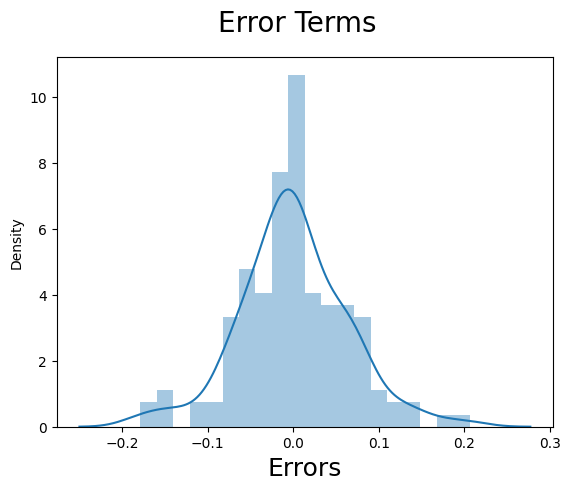

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions

Before making any inference about the equation of the linear regression, let's test it on the test set Applying the scaling on the test sets

Applying the transformation on the test set using the learning of the train set therefore we only transform. we only use those variables which we used to train the final model. So lets use only those.

In [101]:
num_vars=num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio',
                     'carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [102]:
y_test = df_test.pop('price')
X_test = df_test

In [103]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train10= X_train10.drop(['const'], axis=1)
X_test_new = X_test[X_train10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [104]:
# Making predictions
y_pred = lm10.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

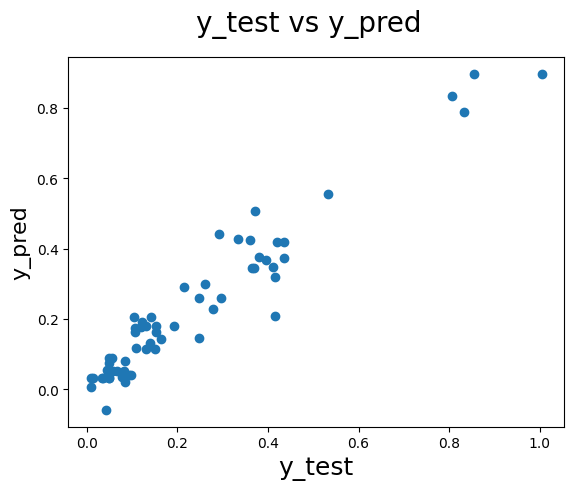

In [105]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

y_test VS y_pred is observed to be almost linear with some variataion occuring. Overall, it is a pretty linear spread.

In [106]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.060337172125658985
Model r2_score: 0.9243618656933258


r2_score on the test data is very close to the trained Adj. R-Squared value of the model. we have a significantly high r2_score and a low RMSE of 0.060.

# FINAL INFERENCE

 Final inference from model evaluation

With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.

Overall we have a decent model, but we also acknowledge that we could do better. Adj. R-squared 0.907 r2_score 0.905 Prob (F-statistic) 9.11e-69 AIC -343.8 BIC -326.1 RMSE 0.060

Suggestions: The chinese company Geely Automotives entering the US market should consider the below listed points,

Average US car price: 13000 USD(approx). For profitability and effective pricing of cars in this new market, the model's price predictors variables have to be regulated and balanced effectively to meet certain price levels and gain an edge over the other competitors.

Also, keeping into account the predominating or the popular factors of a car in US market will give a better understanding of the needs and requirment of the citizens of USA.